# XGBoost Model-based Alpha Signal Prediction using Microblogging Data from social media 

In [15]:
#pip install missingno
#pip install pandas
#pip install matplotlib
#pip install seaborn
#pip install missingno
#pip install scikit-learn
#pip install xgboost
#pip install joblib
#pip install warnings

     --------------------------------------- 10.6/10.6 MB 11.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
import re, string, unicodedata
from sklearn.model_selection import train_test_split
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import joblib
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

# Dataset

In [17]:
data = pd.read_csv('dataset.csv')

In [18]:
data

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
0,1,21/08/18,$NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2
1,2,11/10/18,$WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3
2,3,21/08/18,$DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1
3,4,10/07/18,$ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2
4,5,12/09/18,$FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2
...,...,...,...,...,...,...,...,...,...,...,...
27001,27002,05/10/18,$RF,-0.946205,1.871952,0.068230,-0.348439,0.439969,0.297584,-0.634398,3
27002,27003,30/07/18,$PG,-0.962175,0.623644,0.468051,0.245506,-0.290927,-0.658470,-1.112317,3
27003,27004,16/10/18,$JCP,1.382757,-1.382645,-0.008343,-0.276788,-0.869303,-1.563029,1.372273,2
27004,27005,27/07/18,$NVDA,1.088894,-1.123395,0.027197,0.914267,-0.680183,-0.375689,0.394336,3


In [19]:
data.tail()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
27001,27002,05/10/18,$RF,-0.946205,1.871952,0.068230,-0.348439,0.439969,0.297584,-0.634398,3
27002,27003,30/07/18,$PG,-0.962175,0.623644,0.468051,0.245506,-0.290927,-0.658470,-1.112317,3
27003,27004,16/10/18,$JCP,1.382757,-1.382645,-0.008343,-0.276788,-0.869303,-1.563029,1.372273,2
27004,27005,27/07/18,$NVDA,1.088894,-1.123395,0.027197,0.914267,-0.680183,-0.375689,0.394336,3
27005,27006,14/10/18,$WBA,-0.637959,0.621395,-0.636104,-0.810184,1.587782,-0.413540,0.101924,2


# Exploratory Data Analysis

In [20]:
data.describe(include = 'all')

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
count,27006.000000,27006,27006,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000
unique,NaN,123,1304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,26/07/18,$BAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,344,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,13503.500000,NaN,NaN,0.005429,-0.001005,-0.024421,-0.042420,0.041465,0.002597,0.036744,2.379582
std,7796.105021,NaN,NaN,0.941853,0.996130,0.539555,1.111309,0.976028,0.998839,1.204473,1.008681
min,1.000000,NaN,NaN,-4.114670,-4.578587,-2.609150,-6.329798,-5.480268,-4.338751,-5.347869,1.000000
25%,6752.250000,NaN,NaN,-0.596792,-0.666310,-0.300187,-0.767247,-0.518641,-0.668027,-0.688198,2.000000
50%,13503.500000,NaN,NaN,0.012104,-0.013257,-0.040786,-0.058629,0.072127,0.007417,0.081374,2.000000
75%,20254.750000,NaN,NaN,0.611574,0.669094,0.241424,0.677433,0.616538,0.674592,0.807556,3.000000


### Missing Value

Id        0
date      0
ticker    0
SF1       0
SF2       0
SF3       0
SF4       0
SF5       0
SF6       0
SF7       0
alpha     0
dtype: int64

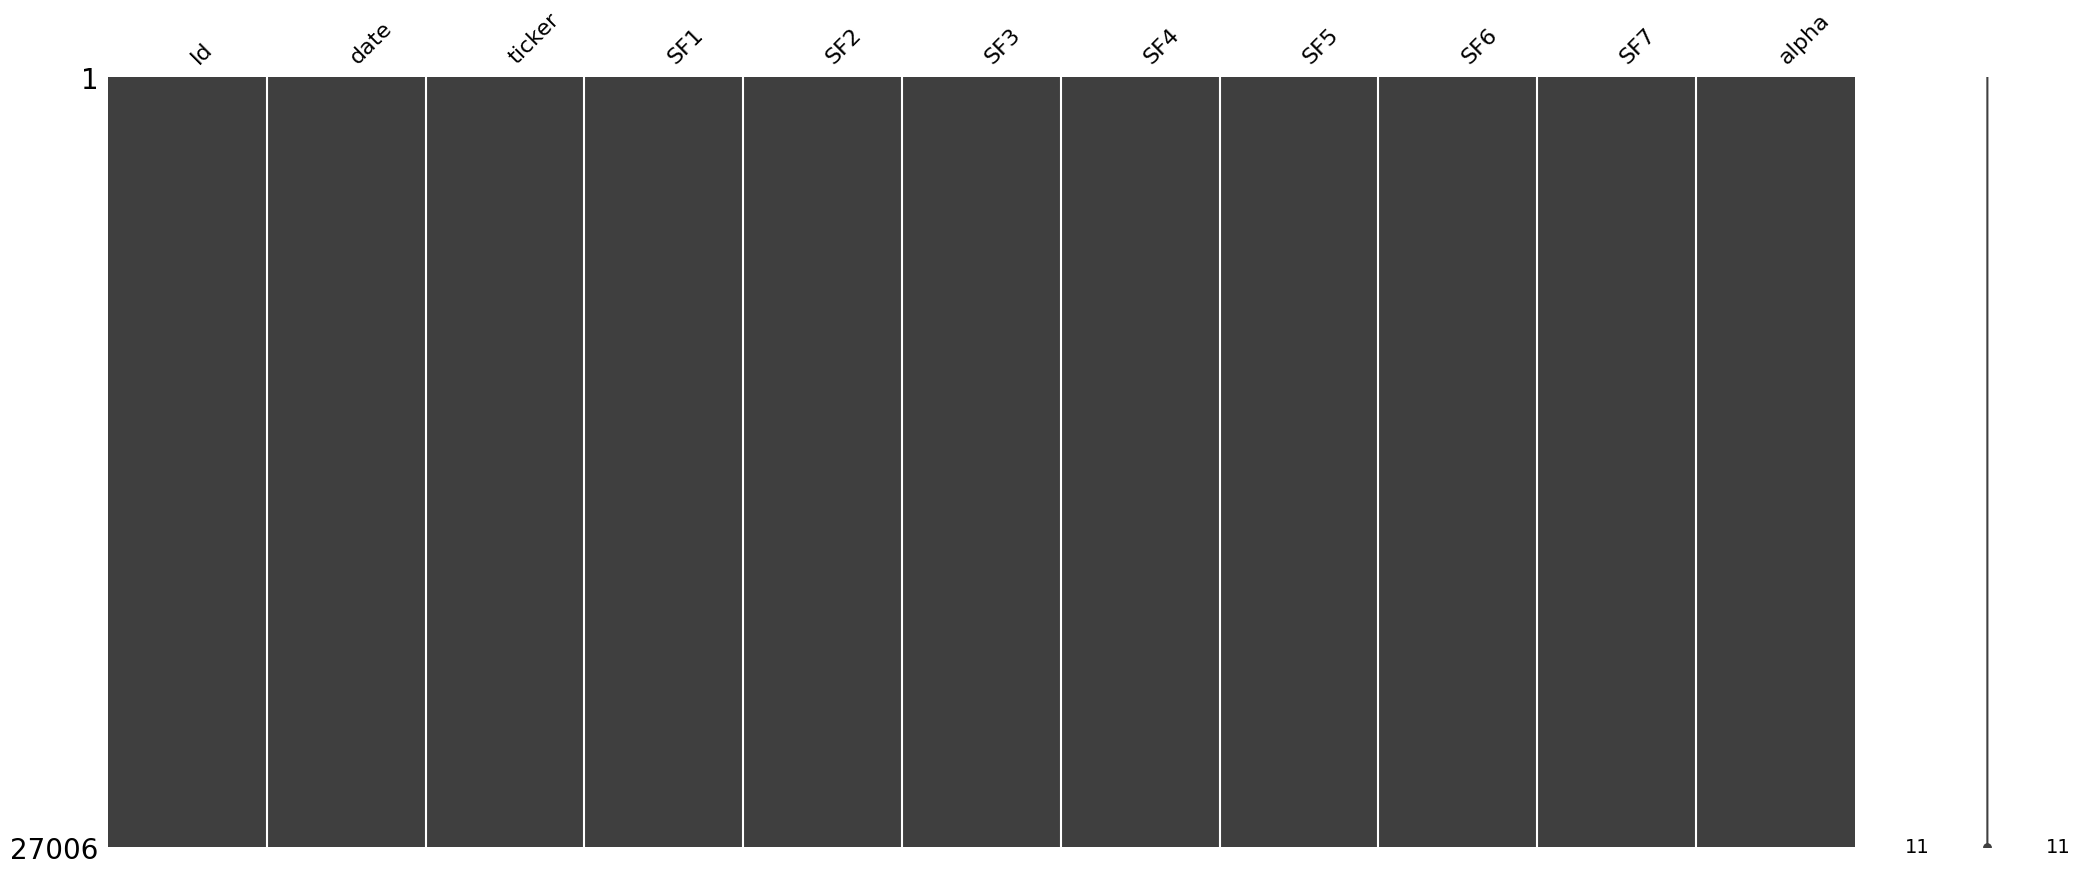

In [21]:
msno.matrix(data)
data.isnull().sum()

In [22]:
data.isnull().sum

<bound method DataFrame.sum of           Id   date  ticker    SF1    SF2    SF3    SF4    SF5    SF6    SF7  \
0      False  False   False  False  False  False  False  False  False  False   
1      False  False   False  False  False  False  False  False  False  False   
2      False  False   False  False  False  False  False  False  False  False   
3      False  False   False  False  False  False  False  False  False  False   
4      False  False   False  False  False  False  False  False  False  False   
...      ...    ...     ...    ...    ...    ...    ...    ...    ...    ...   
27001  False  False   False  False  False  False  False  False  False  False   
27002  False  False   False  False  False  False  False  False  False  False   
27003  False  False   False  False  False  False  False  False  False  False   
27004  False  False   False  False  False  False  False  False  False  False   
27005  False  False   False  False  False  False  False  False  False  False   

       a

### Data Types

In [23]:
data.dtypes

Id          int64
date       object
ticker     object
SF1       float64
SF2       float64
SF3       float64
SF4       float64
SF5       float64
SF6       float64
SF7       float64
alpha       int64
dtype: object

In [24]:
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = data[i].astype('category')

# Data Preprocessing

In [25]:
data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
0,1,21/08/18,$NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2
1,2,11/10/18,$WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3
2,3,21/08/18,$DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1
3,4,10/07/18,$ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2
4,5,12/09/18,$FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27006 entries, 0 to 27005
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Id      27006 non-null  int64   
 1   date    27006 non-null  category
 2   ticker  27006 non-null  category
 3   SF1     27006 non-null  float64 
 4   SF2     27006 non-null  float64 
 5   SF3     27006 non-null  float64 
 6   SF4     27006 non-null  float64 
 7   SF5     27006 non-null  float64 
 8   SF6     27006 non-null  float64 
 9   SF7     27006 non-null  float64 
 10  alpha   27006 non-null  int64   
dtypes: category(2), float64(7), int64(2)
memory usage: 2.0 MB


In [27]:
unique_days=data.date.str.split('/', expand = True)[0].unique()
unique_days

array(['21', '11', '10', '12', '16', '25', '27', '24', '15', '31', '28',
       '09', '04', '26', '23', '06', '17', '18', '19', '05', '08', '01',
       '03', '02', '07', '22', '30', '29', '20', '14', '13'], dtype=object)

In [28]:
print('Unique Days for which data is collected -', data['date'].str.split('/', expand = True)[0].unique(),
      '\nUnique Months for which data is collected -', data['date'].str.split('/', expand = True)[1].unique(),
      '\nUnique Years for which data is collected -', data['date'].str.split('/', expand = True)[2].unique())

Unique Days for which data is collected - ['21' '11' '10' '12' '16' '25' '27' '24' '15' '31' '28' '09' '04' '26'
 '23' '06' '17' '18' '19' '05' '08' '01' '03' '02' '07' '22' '30' '29'
 '20' '14' '13'] 
Unique Months for which data is collected - ['08' '10' '07' '09'] 
Unique Years for which data is collected - ['18']


In [29]:
months=data.date.str.split('/', expand = True)[1].unique()
months

array(['08', '10', '07', '09'], dtype=object)

In [30]:
Years=data.date.str.split('/', expand = True)[2].unique()
Years

array(['18'], dtype=object)

In [31]:
data['Day'] = data['date'].str.split('/', expand = True)[0]
data['Month'] =data['date'].str.split('/', expand = True)[1]

In [32]:
# Stripping '$' from ticker
data['ticker'] = data['ticker'].str.split('$', expand = True)[1]

In [33]:
data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha,Day,Month
0,1,21/08/18,NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2,21,08
1,2,11/10/18,WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3,11,10
2,3,21/08/18,DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1,21,08
3,4,10/07/18,ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2,10,07
4,5,12/09/18,FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2,12,09


In [34]:
data.alpha.unique()

array([2, 3, 1, 4], dtype=int64)

In [35]:
data.dtypes

Id           int64
date      category
ticker      object
SF1        float64
SF2        float64
SF3        float64
SF4        float64
SF5        float64
SF6        float64
SF7        float64
alpha        int64
Day         object
Month       object
dtype: object

In [36]:
data['ticker'] = data['ticker'].astype('category')
data['Day'] = data['Day'].astype('int')
data['Month'] = data['Month'].astype('int')

# Data Visualization

In [37]:
data.tail()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha,Day,Month
27001,27002,05/10/18,RF,-0.946205,1.871952,0.068230,-0.348439,0.439969,0.297584,-0.634398,3,5,10
27002,27003,30/07/18,PG,-0.962175,0.623644,0.468051,0.245506,-0.290927,-0.658470,-1.112317,3,30,7
27003,27004,16/10/18,JCP,1.382757,-1.382645,-0.008343,-0.276788,-0.869303,-1.563029,1.372273,2,16,10
27004,27005,27/07/18,NVDA,1.088894,-1.123395,0.027197,0.914267,-0.680183,-0.375689,0.394336,3,27,7
27005,27006,14/10/18,WBA,-0.637959,0.621395,-0.636104,-0.810184,1.587782,-0.413540,0.101924,2,14,10


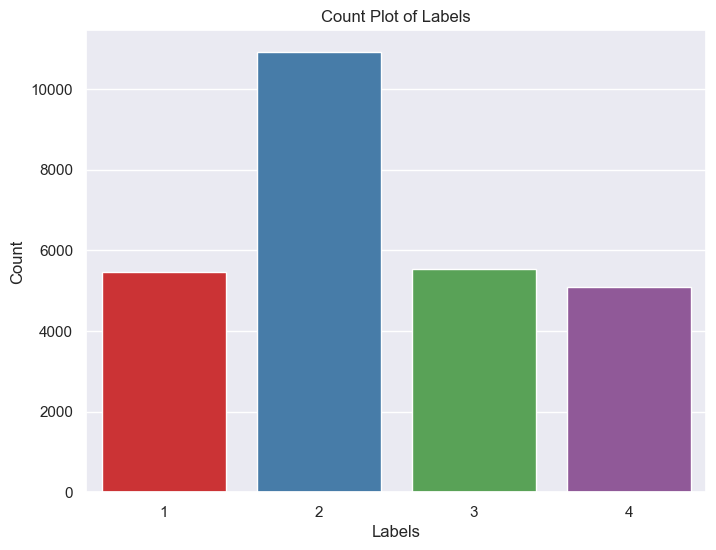

In [38]:
# Assuming you have a dataframe 'data' with a column named 'label'
sns.set(style="darkgrid")  # Set the style of the plot

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='alpha', palette='Set1')  # Adjust 'data' and 'x' based on your dataframe
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count Plot of Labels')
plt.show()

-0.0535372596725262


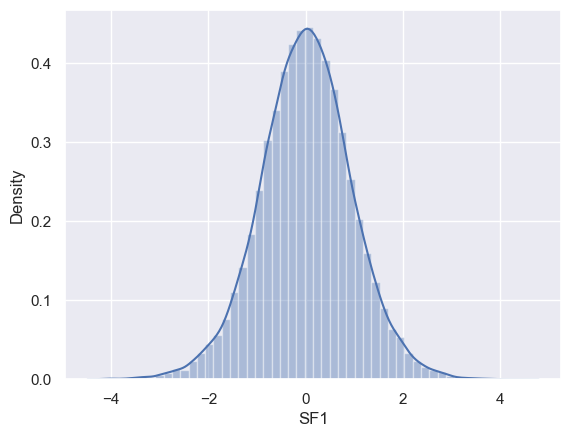

0.02829527406012422


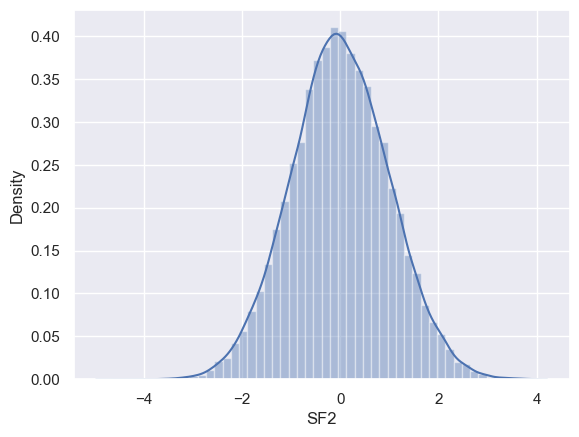

0.15395856965724608


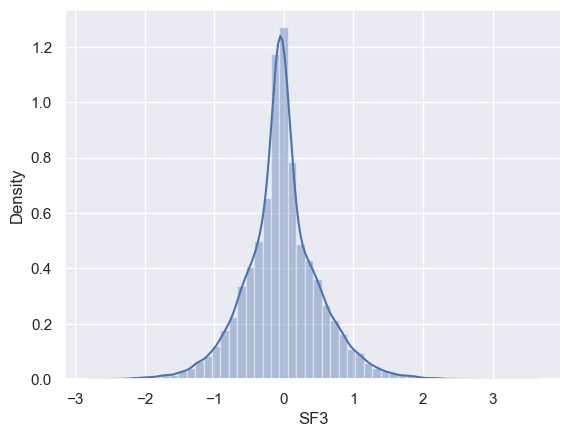

0.0328554665251398


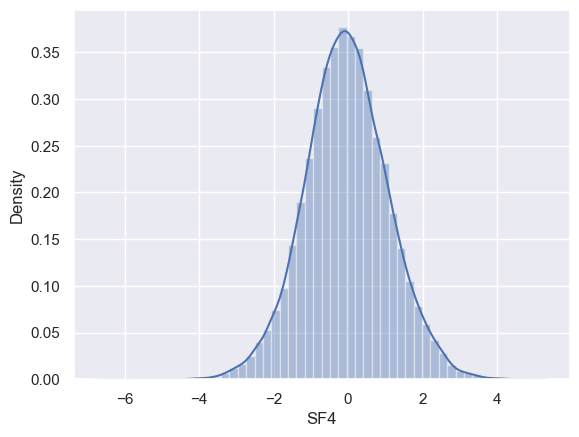

-0.14151466956761277


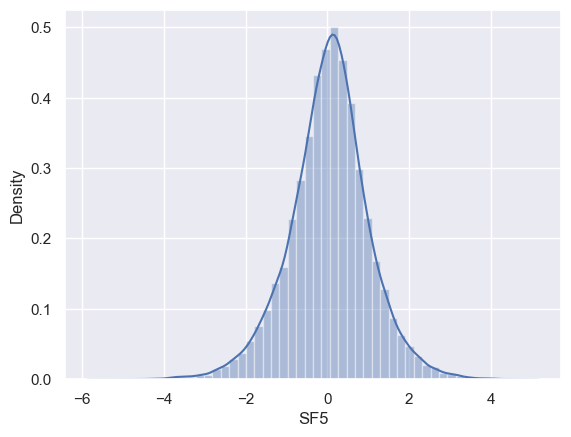

0.008899200380558445


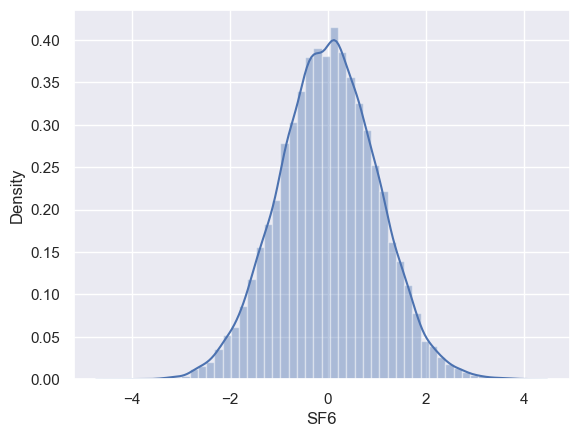

-0.1993963644649288


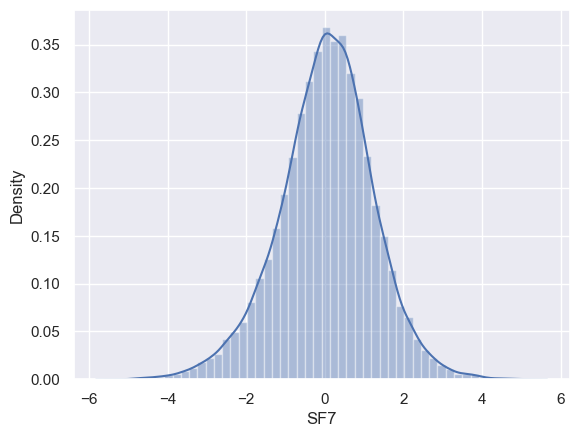

In [39]:
lst=['SF1','SF2','SF3','SF4','SF5','SF6','SF7']

for i in lst:
    print(data[i].skew())
    sns.distplot(data[i])
    plt.show()

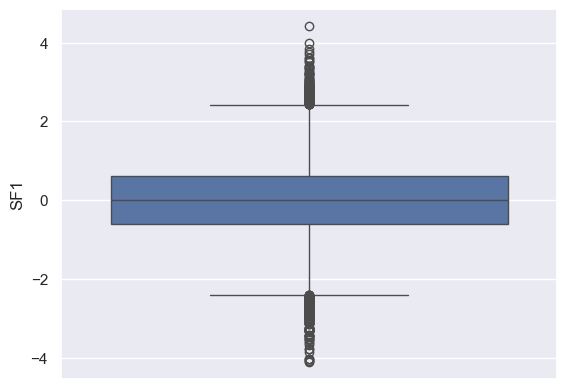

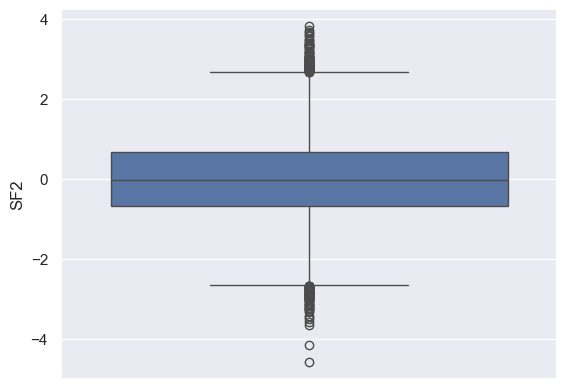

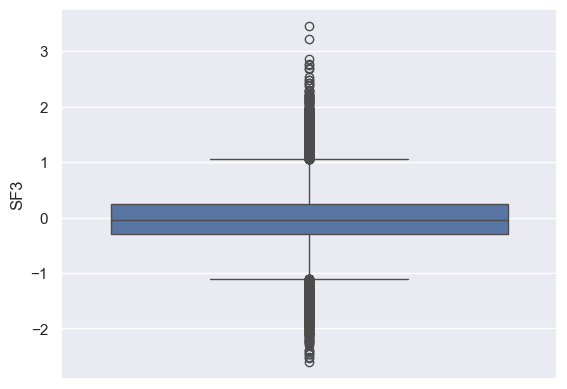

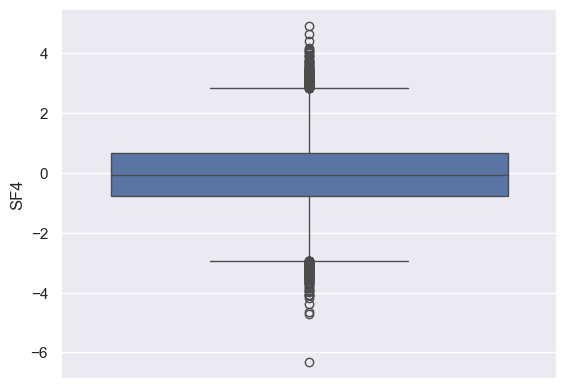

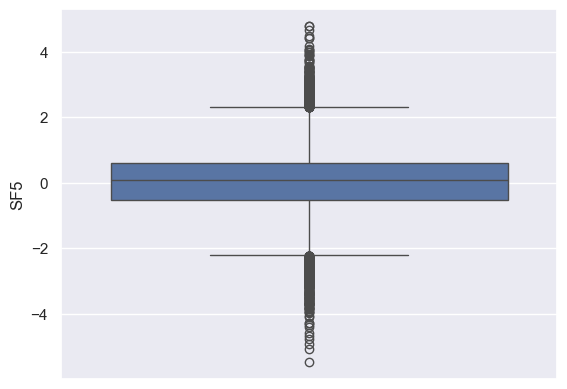

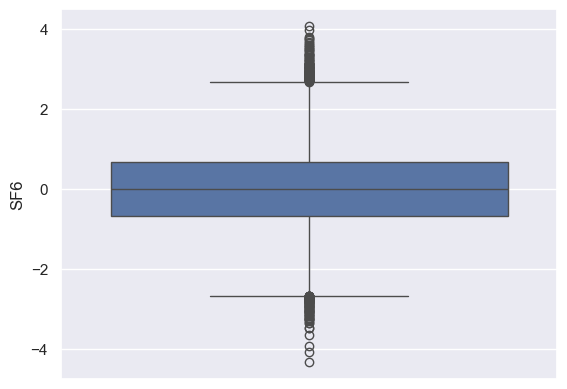

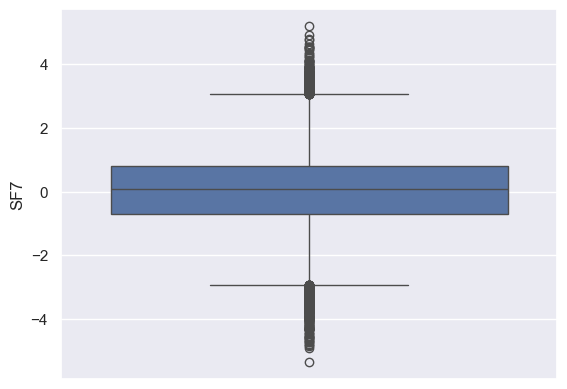

In [40]:
# now its time to check outliers
lst_out=['SF1','SF2','SF3','SF4','SF5','SF6','SF7']
for i in lst_out:
    sns.boxplot(data[i])
    plt.show()

### now removing outlier using winsorizer

In [41]:
!pip install feature-engine

     -------------------------------------- 344.3/344.3 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 9.9/9.9 MB 10.5 MB/s eta 0:00:00
     ------------------------------------- 233.9/233.9 kB 14.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
from feature_engine.outliers import Winsorizer

col=['SF1','SF2','SF3','SF4','SF5','SF6','SF7']
for col in col:
    wi = Winsorizer(capping_method='iqr',tail='both',fold=1.5)
    data[col]=wi.fit_transform(data[[col]])
    data[col]=wi.transform(data[[col]])

In [43]:
sns.set(style='darkgrid')

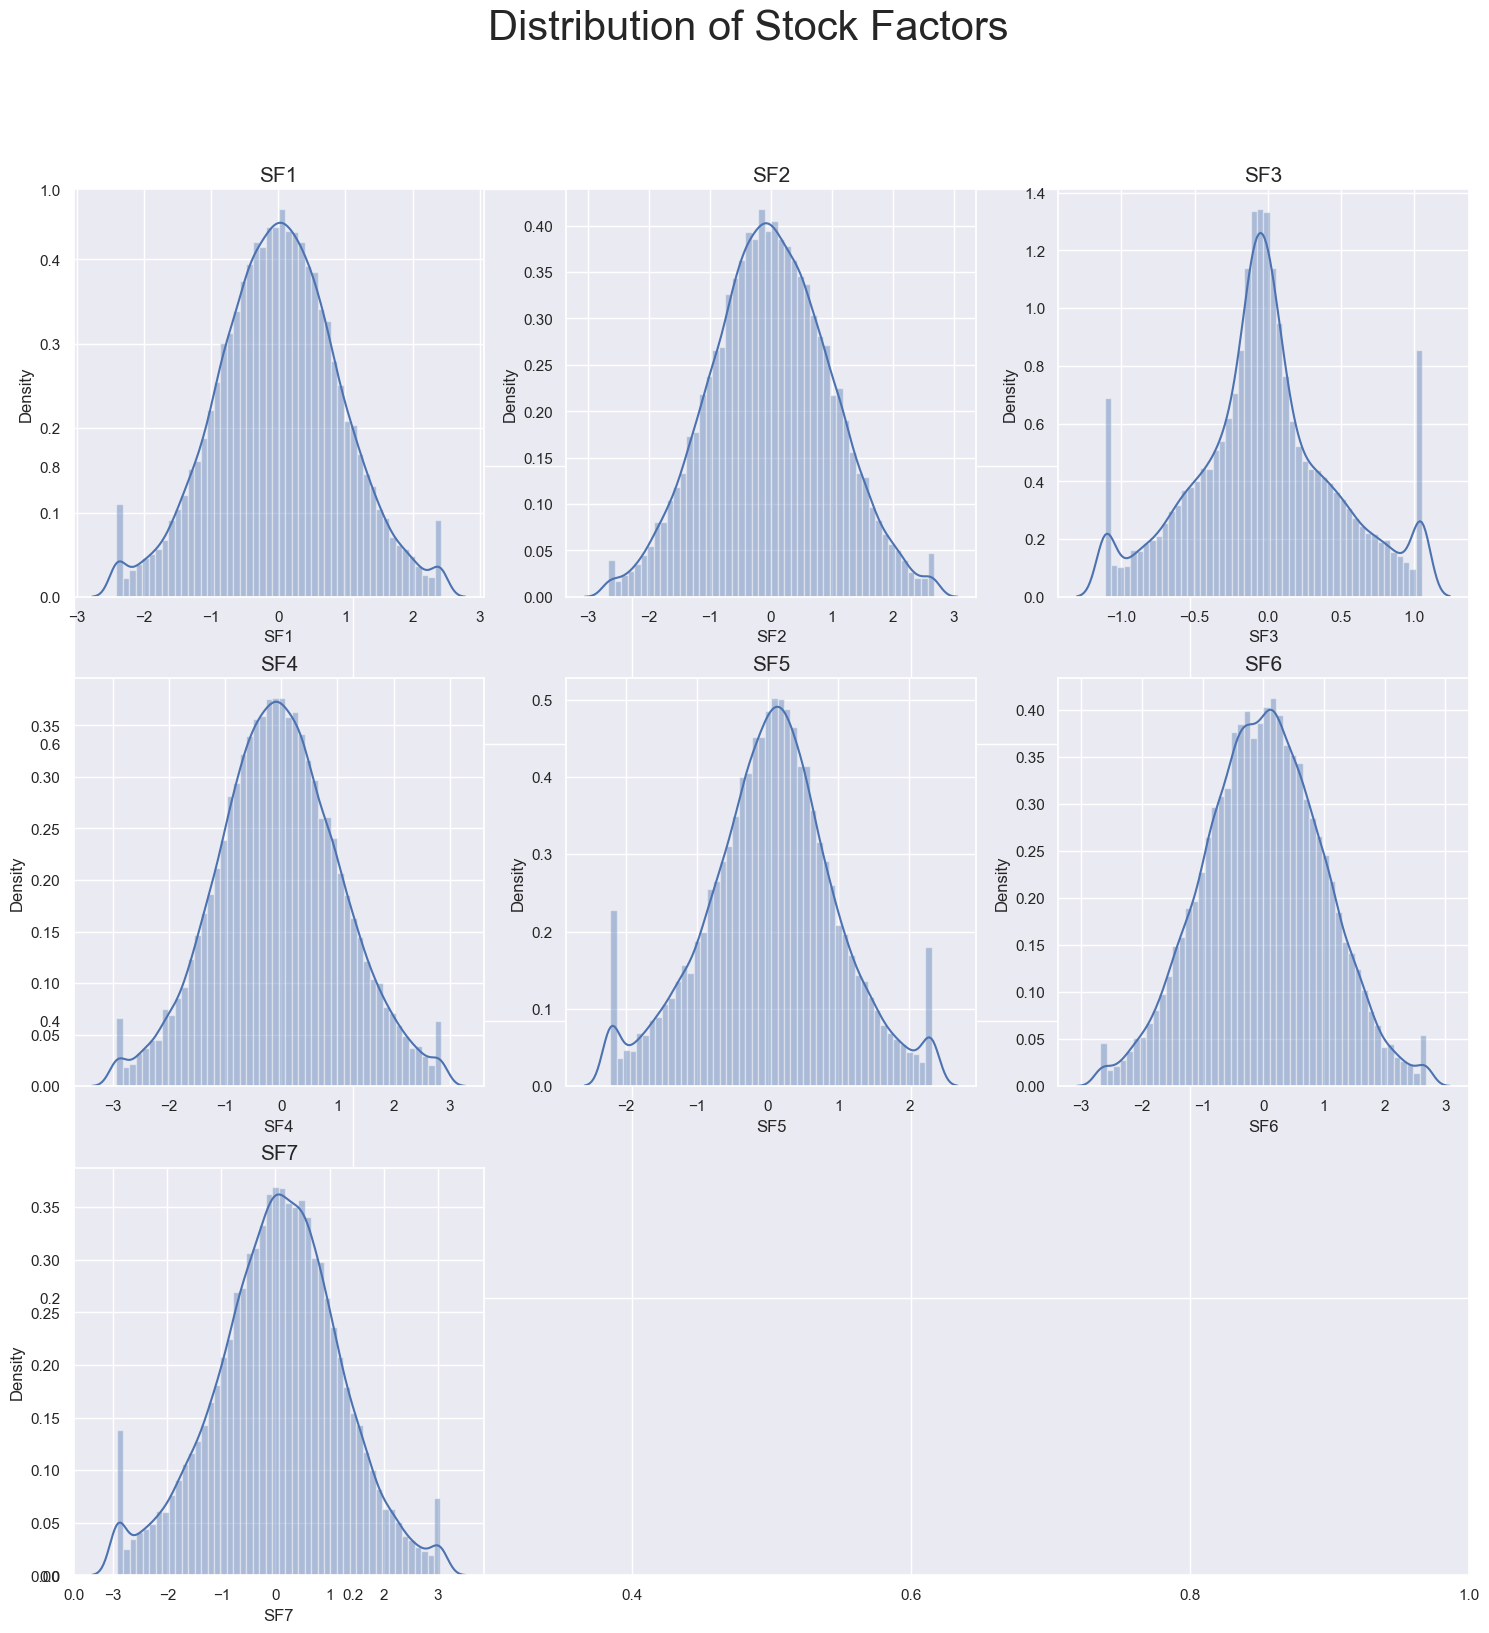

In [44]:
fig, ax = plt.subplots(figsize=(18,18))
fig.suptitle('Distribution of Stock Factors', fontsize = 30)

plt.subplot(331)
ax1 = sns.distplot(data['SF1'])
ax1.set_title('SF1', fontsize = 15)


plt.subplot(332)
ax2 = sns.distplot(data['SF2'])
ax2.set_title('SF2', fontsize = 15)


plt.subplot(333)
ax3 = sns.distplot(data['SF3'])
ax3.set_title('SF3', fontsize = 15)


plt.subplot(334)
ax4 = sns.distplot(data['SF4'])
ax4.set_title('SF4', fontsize = 15)


plt.subplot(335)
ax5 = sns.distplot(data['SF5'])
ax5.set_title('SF5', fontsize = 15)


plt.subplot(336)
ax6 = sns.distplot(data['SF6'])
ax6.set_title('SF6', fontsize = 15)

plt.subplot(337)
ax7 = sns.distplot(data['SF7'])
ax7.set_title('SF7', fontsize = 15)


plt.show()

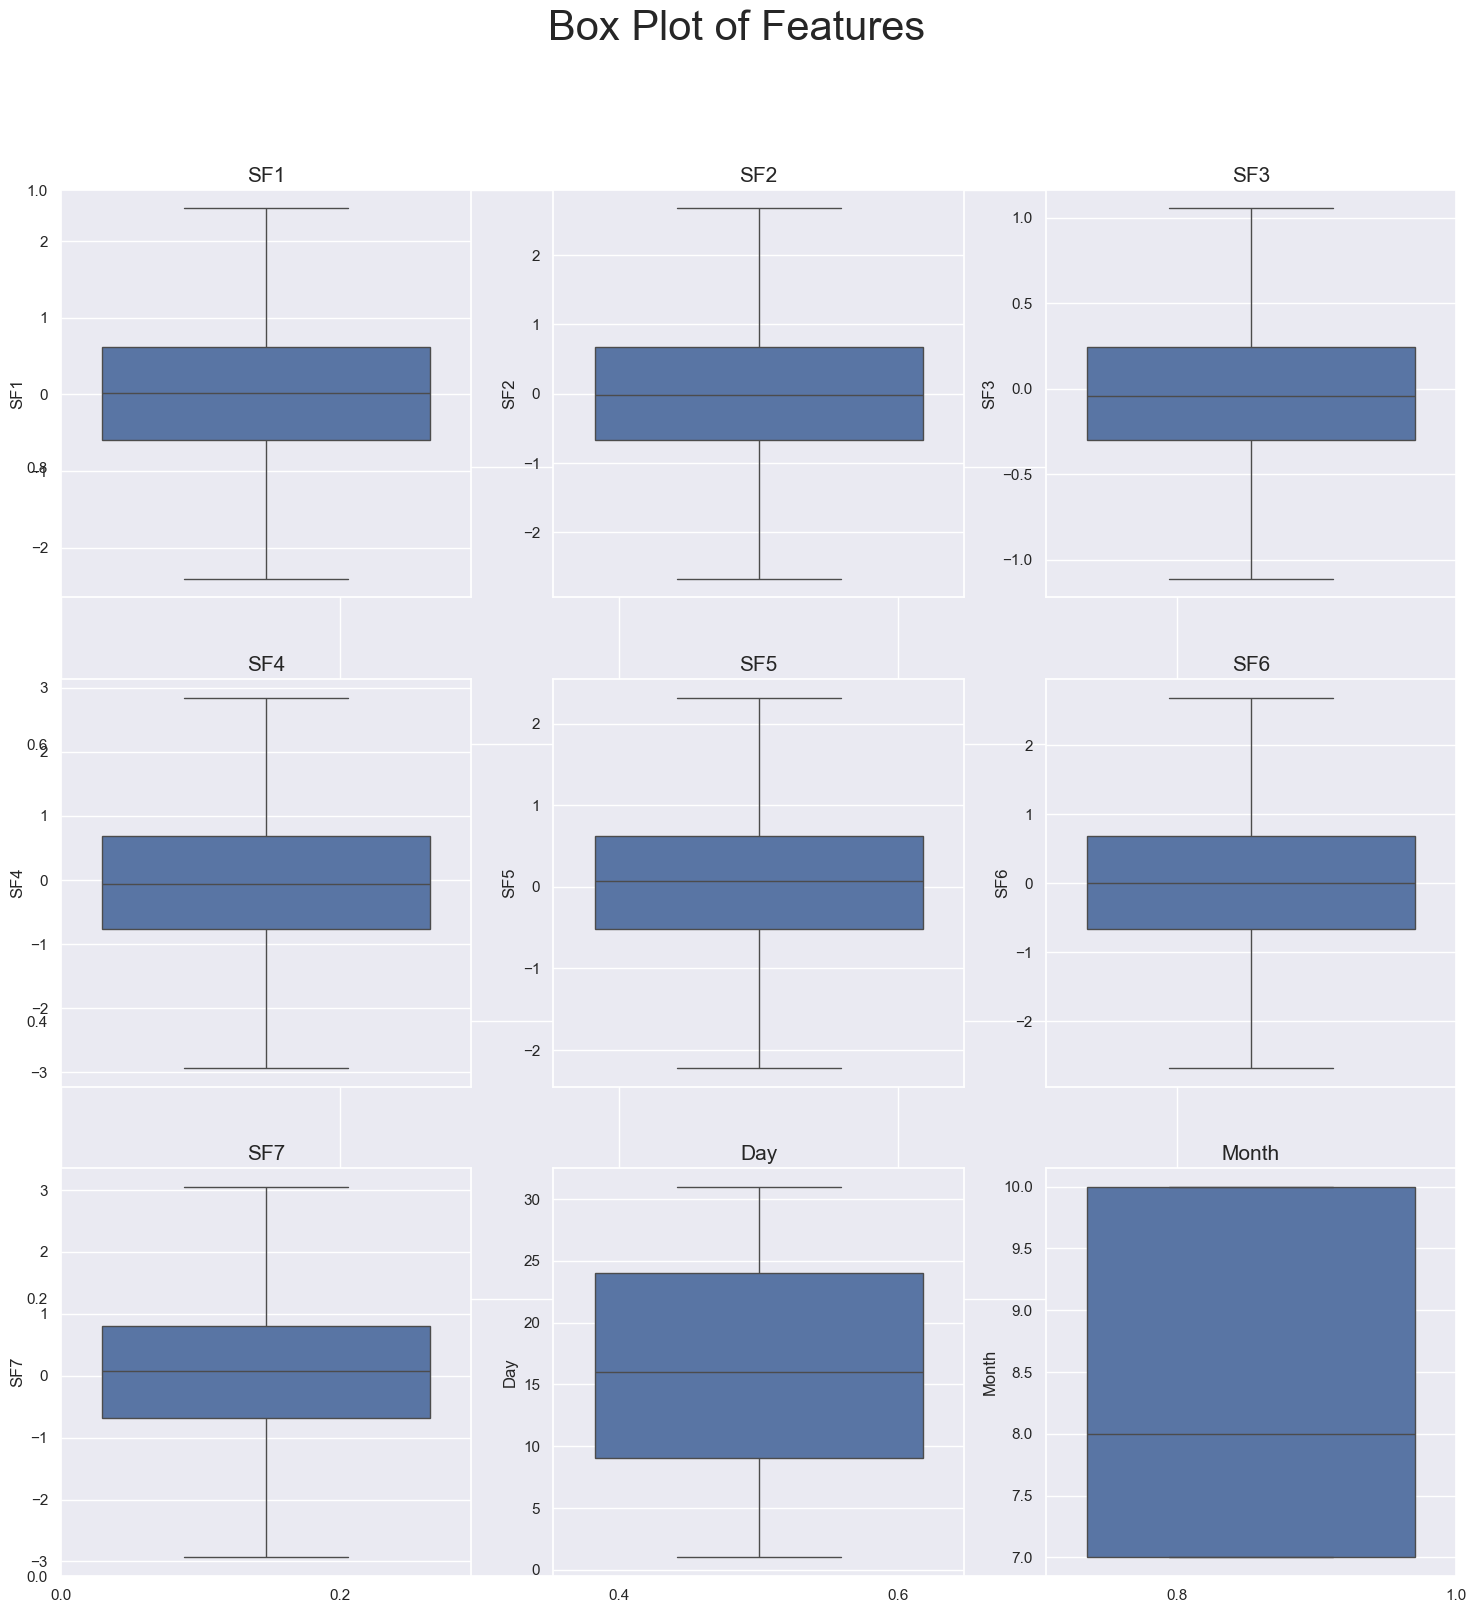

In [45]:
fig, ax = plt.subplots(figsize=(18,18))
fig.suptitle('Box Plot of Features', fontsize = 30)

plt.subplot(331)
ax1 = sns.boxplot(data['SF1'])
ax1.set_title('SF1', fontsize = 15)


plt.subplot(332)
ax2 = sns.boxplot(data['SF2'])
ax2.set_title('SF2', fontsize = 15)


plt.subplot(333)
ax3 = sns.boxplot(data['SF3'])
ax3.set_title('SF3', fontsize = 15)


plt.subplot(334)
ax4 = sns.boxplot(data['SF4'])
ax4.set_title('SF4', fontsize = 15)


plt.subplot(335)
ax5 = sns.boxplot(data['SF5'])
ax5.set_title('SF5', fontsize = 15)


plt.subplot(336)
ax6 = sns.boxplot(data['SF6'])
ax6.set_title('SF6', fontsize = 15)

plt.subplot(337)
ax7 = sns.boxplot(data['SF7'])
ax7.set_title('SF7', fontsize = 15)

plt.subplot(338)
ax8 = sns.boxplot(data['Day'])
ax8.set_title('Day', fontsize = 15)

plt.subplot(339)
ax9 = sns.boxplot(data['Month'])
ax9.set_title('Month', fontsize = 15)


plt.show()

<Axes: xlabel='count', ylabel='Density'>

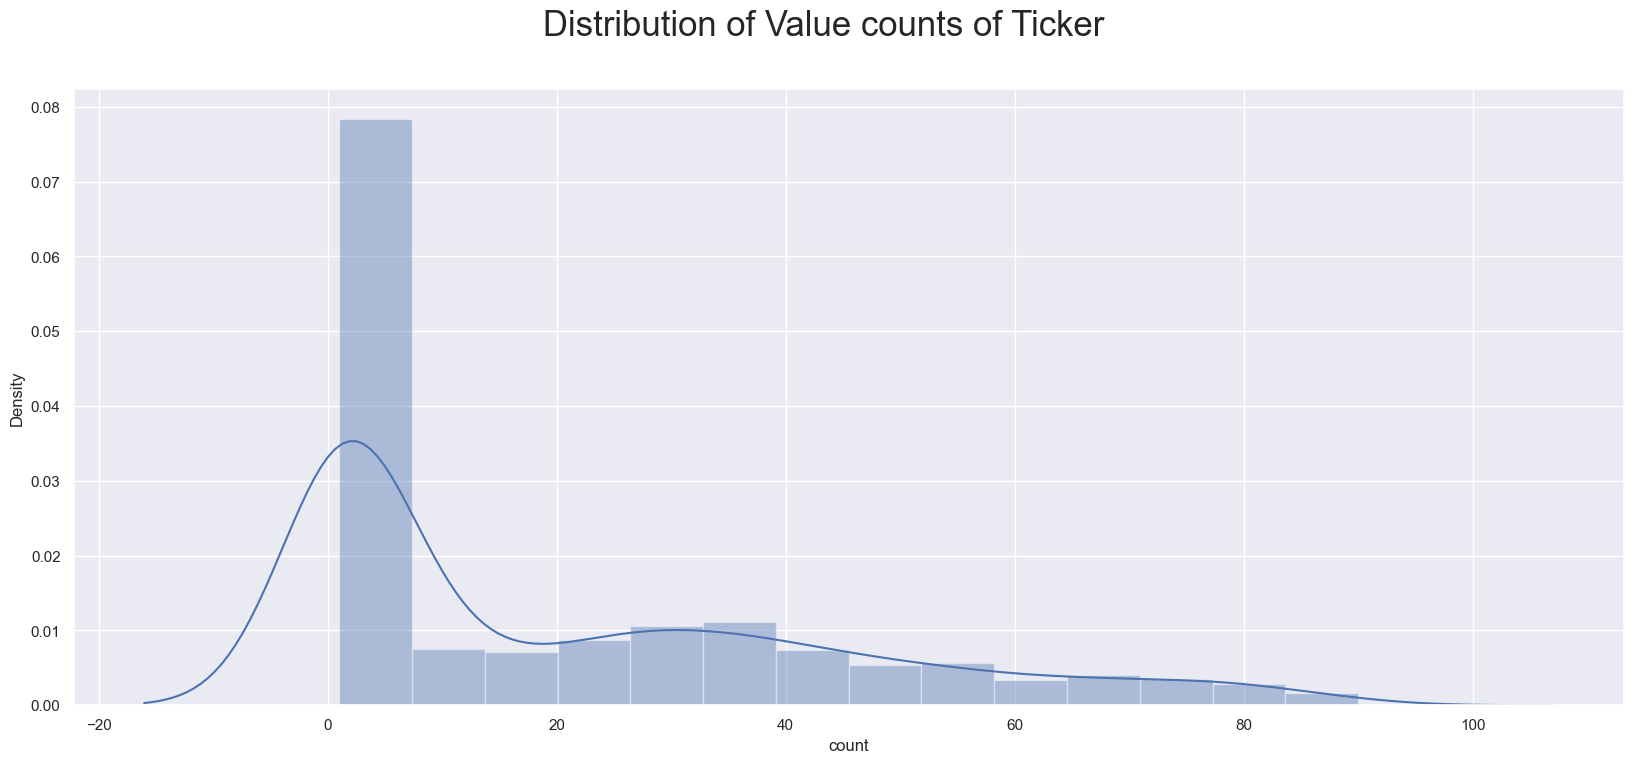

In [46]:
f,ax=plt.subplots(figsize = (20,8))
f.suptitle('Distribution of Value counts of Ticker', fontsize = 25)
sns.distplot(data['ticker'].value_counts())

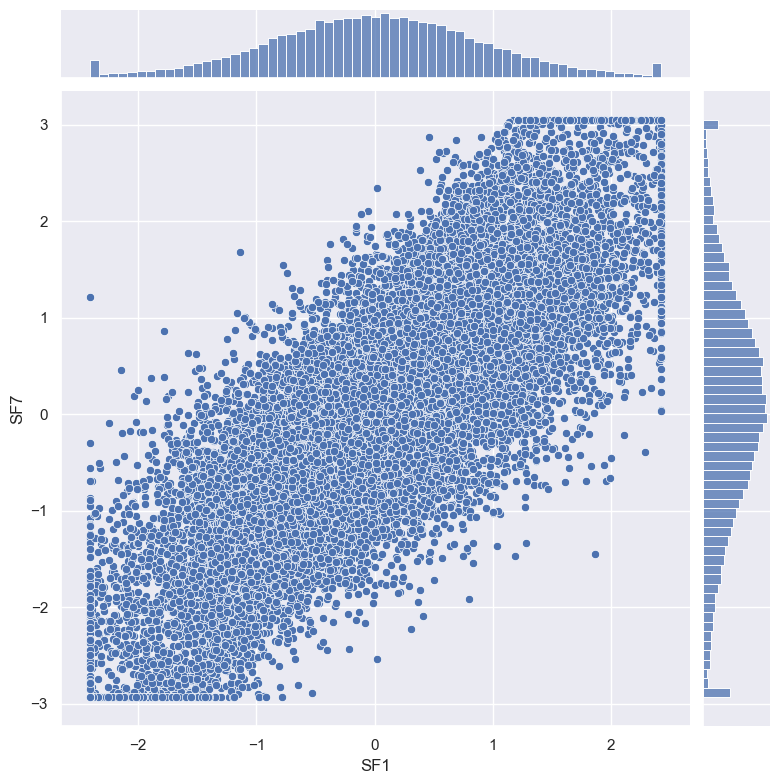

In [47]:
f.suptitle('Distribution of SF1 with SF7', fontsize = 25)
sns.jointplot(x = data['SF1'], y = data['SF7'], height = 8, ratio = 8)

In [48]:
data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha,Day,Month
0,1,21/08/18,NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2,21,8
1,2,11/10/18,WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3,11,10
2,3,21/08/18,DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1,21,8
3,4,10/07/18,ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2,10,7
4,5,12/09/18,FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2,12,9


In [49]:
data = data.drop('date', axis=1)

In [50]:
data.isnull().sum()

Id        0
ticker    0
SF1       0
SF2       0
SF3       0
SF4       0
SF5       0
SF6       0
SF7       0
alpha     0
Day       0
Month     0
dtype: int64

In [51]:
data.ticker  .unique()

['NTAP', 'WYNN', 'DRI', 'ge', 'FE', ..., 'hrs', 'UNIT', 'GEVO', 'QTM', 'afl']
Length: 1300
Categories (1300, object): ['', 'A', 'AA', 'AABA', ..., 'yum', 'zbh', 'zion', 'zts']

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming data is your DataFrame and 'ticker' is the text-based column
ticker_data = data['ticker']

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'ticker' data using TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(ticker_data)

# Convert the TF-IDF matrix to a DataFrame for easier analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


# Drop the original 'ticker' column from the data DataFrame
data = data.drop('ticker', axis=1)

# Concatenate the original data without the 'ticker' column with the TF-IDF DataFrame
data = pd.concat([data, tfidf_df], axis=1)

In [54]:
data

,Id,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha,Day,...,yelp,yext,yum,zbh,zion,zoes,zto,zts,zumz,zuo
0,1,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27001,27002,-0.946205,1.871952,0.068230,-0.348439,0.439969,0.297584,-0.634398,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27002,27003,-0.962175,0.623644,0.468051,0.245506,-0.290927,-0.658470,-1.112317,3,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27003,27004,1.382757,-1.382645,-0.008343,-0.276788,-0.869303,-1.563029,1.372273,2,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27004,27005,1.088894,-1.123395,0.027197,0.914267,-0.680183,-0.375689,0.394336,3,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['alpha'] = label_encoder.fit_transform(data['alpha'])

In [41]:
#X  AND Y

In [56]:
X=data.drop('alpha', axis=1)
X

,Id,SF1,SF2,SF3,SF4,SF5,SF6,SF7,Day,Month,...,yelp,yext,yum,zbh,zion,zoes,zto,zts,zumz,zuo
0,1,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,21,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,11,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,21,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,10,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,12,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27001,27002,-0.946205,1.871952,0.068230,-0.348439,0.439969,0.297584,-0.634398,5,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27002,27003,-0.962175,0.623644,0.468051,0.245506,-0.290927,-0.658470,-1.112317,30,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27003,27004,1.382757,-1.382645,-0.008343,-0.276788,-0.869303,-1.563029,1.372273,16,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27004,27005,1.088894,-1.123395,0.027197,0.914267,-0.680183,-0.375689,0.394336,27,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:

y=data['alpha']
y

0        1
1        2
2        0
3        1
4        1
        ..
27001    2
27002    2
27003    1
27004    2
27005    1
Name: alpha, Length: 27006, dtype: int64

In [44]:
#Splitting

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [59]:
X_train.shape

(21604, 866)

In [60]:
X_test.shape

(5402, 866)

### MODEL BUILDING

In [61]:
# Initialize the classifier

clf = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [62]:
y_pred = clf.predict(X_test)

In [63]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.6356904850055535

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.51      0.52      1097
           1       0.79      0.84      0.81      2153
           2       0.48      0.44      0.46      1114
           3       0.56      0.55      0.56      1038

    accuracy                           0.64      5402
   macro avg       0.59      0.59      0.59      5402
weighted avg       0.63      0.64      0.63      5402



In [64]:
confusionmatrix=confusion_matrix(y_test, y_pred)
confusionmatrix

array([[ 555,  163,  251,  128],
       [ 114, 1812,  117,  110],
       [ 266,  147,  494,  207],
       [ 118,  172,  175,  573]], dtype=int64)

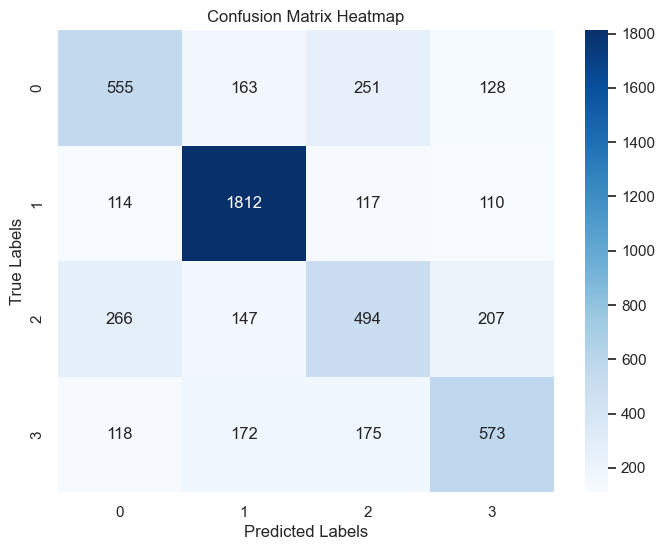

In [65]:

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusionmatrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()

## Modelling

In [66]:
from xgboost import XGBClassifier

# model with default parameter

xgb_model = XGBClassifier()

# fit_model
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### Hyper parametric tunning

In [54]:
#XGBOOST CLASSIFIER

Model loaded from xgboost_model.pkl
Accuracy: 80.0


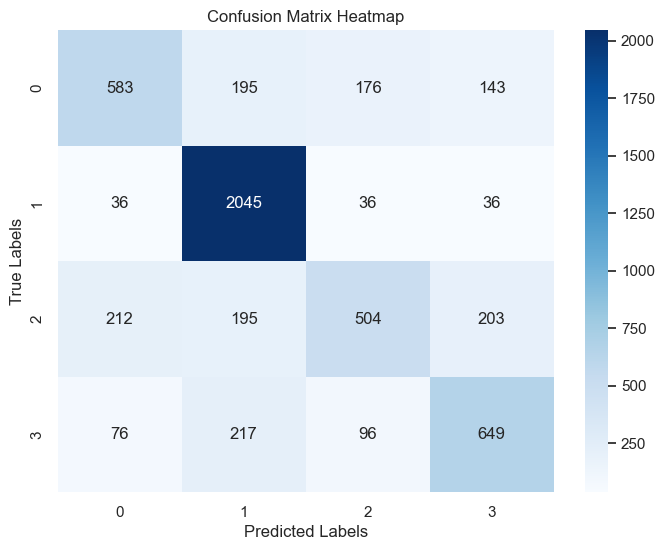

In [67]:
# Check if the model file exists
model_filename = 'xgboost_model.pkl'
if os.path.exists(model_filename):
    # Load the trained model
    clf = joblib.load(model_filename)
    print(f"Model loaded from {model_filename}")
else:
    # Train the XGBoost classifier
    clf = xgb.XGBClassifier(max_depth=20, learning_rate=0.001, n_estimators=200, subsample=1.0,
                            colsample_bytree=0.8, random_state=0)
    clf.fit(X_train, y_train)
   # clf = xgb.XGBClassifier(max_depth=6, learning_rate=0.001, n_estimators=200, subsample=1.0,
    #                        colsample_bytree=0.8, random_state=0)
    # Save the trained model to a file
    joblib.dump(clf, model_filename)
    print(f"Model saved as {model_filename}")

# Make predictions on the test set using the loaded or trained model
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test[:10], y_pred[:10])*100
print('Accuracy:', accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [68]:
report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.64      0.53      0.58      1097
           1       0.77      0.95      0.85      2153
           2       0.62      0.45      0.52      1114
           3       0.63      0.63      0.63      1038

    accuracy                           0.70      5402
   macro avg       0.67      0.64      0.65      5402
weighted avg       0.69      0.70      0.69      5402



In [57]:
# nearly 67% accuracy got